# CS596 Machine Learning 
# Homework Assignment 6 (Part 3): <br>Support vector machines (SVM) applied on image classification

### Due 11:59 pm, Friday, 12/14/2018

**Total credits: 5**

In Part3 of HA6, we will play with SVM classifiers provided by `sklearn` package. We will see how SVM models perform on the image classification task on sign language data, and a non-linearly separable toy data. We will also plot the data points, while distinguishing support vectors from others.

You do not to worry about the underlying implementations of SVM, e.g. Lagrangian, quadratic programming etc. `sklearn` handles these for us.

Check out the __[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)__ for `sklearn.svm.SVC` when you need help.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons

%matplotlib inline

## Load data

In [2]:
X_train_all = np.load(open('X_train.npy', 'rb'))
Y_train_all = np.load(open('Y_train.npy', 'rb'))
X_test_all = np.load(open('X_test.npy', 'rb'))
Y_test_all = np.load(open('Y_test.npy', 'rb'))

# print(X_train_all.shape)
# print(Y_train_all.shape)
# print(X_test_all.shape)
# print(Y_test_all.shape)
# print(Y_test_all[40,]) # 0
# print(Y_test_all[41,]) # 1
# print(Y_test_all[82,]) # 2

X_train1 = X_train_all[:163, :]
X_train2 = X_train_all[163:327, :]
X_train = np.concatenate((X_train1, X_train2), axis=0)
X_train = X_train.reshape(X_train.shape[0], -1)

Y_train1 = Y_train_all[:163, :]
Y_train2 = Y_train_all[163:327, :]
Y_train = np.concatenate((Y_train1, Y_train2), axis=0)
Y_train = np.argmax(Y_train, axis=1)

X_test1 = X_test_all[:41, :]
X_test2 = X_test_all[41:82, :]
X_test = np.concatenate((X_test1, X_test2), axis=0)
X_test = X_test.reshape(X_test.shape[0], -1)

Y_test1 = Y_test_all[:41, :]
Y_test2 = Y_test_all[41:82, :]
Y_test = np.concatenate((Y_test1, Y_test2), axis=0)
Y_test = np.argmax(Y_test, axis=1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (327, 4096)
Y_train shape: (327,)
X_test shape: (82, 4096)
Y_test shape: (82,)


## Task 3.1 SVM for image classification (linear kernel)
**0.5 credit**

Define the classifier by calling `svm.SVC()`, with `kernel` set to 'linear', and all other arguments with default values. Call `fit()` to train the classifier on X_train, Y_train. Call `score()` on X_test, Y_test to compute the prediction accuracy on test set.

In [3]:
### START TODO ###
clf = svm.SVC(kernel='linear')
clf.fit(X_train,Y_train)
acc = clf.score(X_test,Y_test)
### END TODO ###

print('Accuracy on test data:', acc)

Accuracy on test data: 0.975609756097561


### Expected output
|&nbsp;|&nbsp; |          
|--|--|
|**Accuracy on test data:**|0.975609756097561|

***

## Task 3.2 Plot support vectors and other data points
**1 credit**

It will be interesting to see how the support vectors distribute among data points. Here we are plotting the projections of data onto the first two principal components. PCA is done using `sklearn`.

The indices of support vectors are stored in `clf.support_`. The number of support vectors for all classes are stored in `clf.n_support_`. Therefore, the indices of SVs for $y=0$ class are in `clf.support_[:clf.n_support_]`.

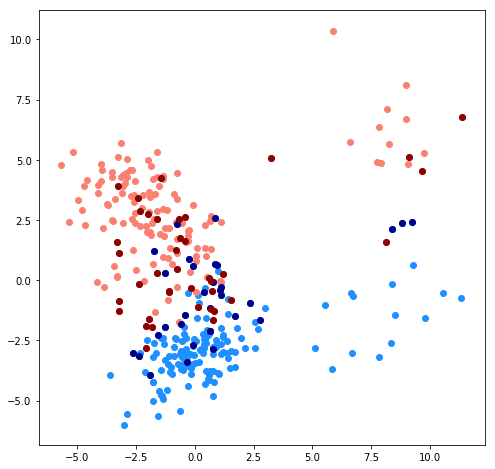

In [46]:
# Plot data and support vectors

# PCA projection
pca = PCA(n_components=2)
pca.fit(X_train)
X_proj = pca.transform(X_train)

# Start plotting
fig = plt.figure(figsize=(8,8))

# Plot data points
plt.scatter(X_proj[:163, 0], 
            X_proj[:163, 1], c='dodgerblue')
plt.scatter(X_proj[163:327, 0], 
            X_proj[163:327, 1], c='salmon')

### START TODO ###

plt.scatter(X_proj[clf.support_[:clf.n_support_[0]], 0], 
            X_proj[clf.support_[:clf.n_support_[0]], 1], c='darkblue')

plt.scatter(X_proj[clf.support_[clf.n_support_[0]:clf.support_.size], 0], 
             X_proj[clf.support_[clf.n_support_[0]:clf.support_.size], 1], c='darkred')



### END TODO ###

plt.show()

### Expected output
<img src="sign_lang_SVs.png">

***

## Task 3.3 Search the optimal C
**1.5 credit**

Search the C that gives highest performance on test set. Refer to the documentation for the correct way of using RBF and polynomial kernels (set argument `gamma='scale'`).

In [47]:
# Linear kernel
print('Linear kernel')
for c_val in np.power(2, np.arange(-4,5,1), dtype=np.float64):
    ### START TODO ###

    clf2 = svm.SVC(C=c_val,kernel='linear')
    clf2.fit(X_train,Y_train)
    acc = clf2.score(X_test,Y_test)
    
    ### START TODO ###
    print('C = {}, SV# = {}, test accuracy = {}'.format(c_val, len(clf2.support_), acc))

    
# RBF kernel
print()
print('RBF kernel')
for c_val in np.power(2, np.arange(-4,5,1), dtype=np.float64):
      ### START TODO ###
    
    clf3 = svm.SVC(C=c_val,kernel='rbf',gamma='scale')
    clf3.fit(X_train,Y_train)
    acc = clf3.score(X_test,Y_test)
    
    ### START TODO ###
    print('C = {}, SV# = {}, test accuracy = {}'.format(c_val, len(clf3.support_), acc))


# Polynomial kernel
print()
print('Polynomial kernel')
for c_val in np.power(2, np.arange(-4,5,1), dtype=np.float64):
    ### START TODO ###
    
    clf4 = svm.SVC(C=c_val,kernel='poly',gamma='scale')
    clf4.fit(X_train,Y_train)
    acc = clf4.score(X_test,Y_test)
    
    ### START TODO ###
    print('C = {}, SV# = {}, test accuracy = {}'.format(c_val, len(clf4.support_), acc))

Linear kernel
C = 0.0625, SV# = 71, test accuracy = 0.975609756097561
C = 0.125, SV# = 71, test accuracy = 0.975609756097561
C = 0.25, SV# = 71, test accuracy = 0.975609756097561
C = 0.5, SV# = 71, test accuracy = 0.975609756097561
C = 1.0, SV# = 71, test accuracy = 0.975609756097561
C = 2.0, SV# = 71, test accuracy = 0.975609756097561
C = 4.0, SV# = 71, test accuracy = 0.975609756097561
C = 8.0, SV# = 71, test accuracy = 0.975609756097561
C = 16.0, SV# = 71, test accuracy = 0.975609756097561

RBF kernel
C = 0.0625, SV# = 326, test accuracy = 0.7439024390243902
C = 0.125, SV# = 305, test accuracy = 0.9390243902439024
C = 0.25, SV# = 241, test accuracy = 0.9390243902439024
C = 0.5, SV# = 182, test accuracy = 0.9390243902439024
C = 1.0, SV# = 138, test accuracy = 0.9512195121951219
C = 2.0, SV# = 108, test accuracy = 0.975609756097561
C = 4.0, SV# = 87, test accuracy = 0.9878048780487805
C = 8.0, SV# = 75, test accuracy = 0.9878048780487805
C = 16.0, SV# = 78, test accuracy = 0.987804878

### Expected output

|Linear kernel|&nbsp;|          
|--|--|
C = 0.0625, SV# = 71, test accuracy = 0.975609756097561
C = 0.125, SV# = 71, test accuracy = 0.975609756097561
C = 0.25, SV# = 71, test accuracy = 0.975609756097561
C = 0.5, SV# = 71, test accuracy = 0.975609756097561
C = 1.0, SV# = 71, test accuracy = 0.975609756097561
C = 2.0, SV# = 71, test accuracy = 0.975609756097561
C = 4.0, SV# = 71, test accuracy = 0.975609756097561
C = 8.0, SV# = 71, test accuracy = 0.975609756097561
C = 16.0, SV# = 71, test accuracy = 0.975609756097561

|RBF kernel|&nbsp;|          
|--|--|
C = 0.0625, SV# = 326, test accuracy = 0.7439024390243902
C = 0.125, SV# = 305, test accuracy = 0.9390243902439024
C = 0.25, SV# = 241, test accuracy = 0.9390243902439024
C = 0.5, SV# = 182, test accuracy = 0.9390243902439024
C = 1.0, SV# = 138, test accuracy = 0.9512195121951219
C = 2.0, SV# = 108, test accuracy = 0.975609756097561
C = 4.0, SV# = 87, test accuracy = 0.9878048780487805
C = 8.0, SV# = 75, test accuracy = 0.9878048780487805
C = 16.0, SV# = 78, test accuracy = 0.9878048780487805

|Polynomial kernel|&nbsp;|          
|--|--|
C = 0.0625, SV# = 138, test accuracy = 0.9634146341463414
C = 0.125, SV# = 109, test accuracy = 0.9878048780487805
C = 0.25, SV# = 87, test accuracy = 0.9878048780487805
C = 0.5, SV# = 73, test accuracy = 0.975609756097561
C = 1.0, SV# = 65, test accuracy = 0.975609756097561
C = 2.0, SV# = 67, test accuracy = 0.975609756097561
C = 4.0, SV# = 69, test accuracy = 0.975609756097561
C = 8.0, SV# = 69, test accuracy = 0.975609756097561
C = 16.0, SV# = 69, test accuracy = 0.975609756097561

***

## Task 3.4 Apply SVM on non-separable toy data

**2 credits**

Build classifiers with three kernels (linear, RBF, and polynomial) and apply them on a toy dataset. Then plot the support vectors together with other data points. Which one do you think has the best decision boundary?

toy_X (100, 2)
toy_Y (100,)
test 42
test2  21


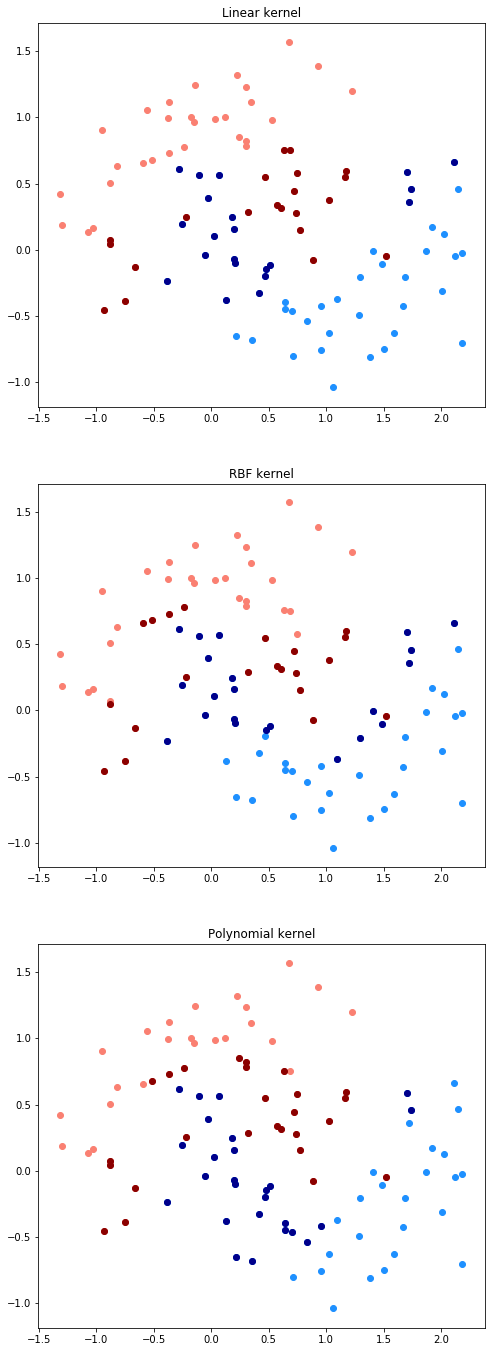

In [48]:
toy_data = make_moons(noise=0.3, random_state=0)
toy_X, toy_Y = toy_data

print('toy_X', toy_X.shape)
print('toy_Y', toy_Y.shape)

# Linear kernel 
### START TODO ###

clf_toy = svm.SVC(kernel='linear')
clf_toy.fit(toy_X, toy_Y)

### END TODO ###
print("test",clf_toy.support_.size)

print("test2 ",clf_toy.n_support_[1])


fig = plt.figure(figsize=(8,24))
fig.add_subplot(3, 1, 1)
plt.scatter(toy_X[toy_Y==0,0], toy_X[toy_Y==0,1], c='salmon')
plt.scatter(toy_X[toy_Y==1,0], toy_X[toy_Y==1,1], c='dodgerblue')
### START TODO ###

plt.scatter(toy_X[clf_toy.support_[:clf_toy.n_support_[0]], 0],
            toy_X[clf_toy.support_[:clf_toy.n_support_[0]], 1],c='darkred')


plt.scatter(toy_X[clf_toy.support_[clf_toy.n_support_[0]:clf_toy.support_.size], 0], 
             toy_X[clf_toy.support_[clf_toy.n_support_[0]:clf_toy.support_.size], 1], c='darkblue')


### END TODO ###
plt.title('Linear kernel')

# RBF kernel
### START TODO ###

clf_toy2 = svm.SVC(kernel='rbf',gamma='scale')
clf_toy2.fit(toy_X, toy_Y)

### END TODO ###

fig.add_subplot(3, 1, 2)
plt.scatter(toy_X[toy_Y==0,0], toy_X[toy_Y==0,1], c='salmon')
plt.scatter(toy_X[toy_Y==1,0], toy_X[toy_Y==1,1], c='dodgerblue')
### START TODO ###

plt.scatter(toy_X[clf_toy2.support_[:clf_toy2.n_support_[0]], 0],
            toy_X[clf_toy2.support_[:clf_toy2.n_support_[0]], 1],c='darkred')


plt.scatter(toy_X[clf_toy2.support_[clf_toy2.n_support_[0]:clf_toy2.support_.size], 0], 
             toy_X[clf_toy2.support_[clf_toy2.n_support_[0]:clf_toy2.support_.size], 1], c='darkblue')

### END TODO ###
plt.title('RBF kernel')


# Polynomial kernel
### START TODO ###

clf_toy3 = svm.SVC(kernel='poly',gamma='scale')
clf_toy3.fit(toy_X, toy_Y)

### END TODO ###

fig.add_subplot(3, 1, 3)
plt.scatter(toy_X[toy_Y==0,0], toy_X[toy_Y==0,1], c='salmon')
plt.scatter(toy_X[toy_Y==1,0], toy_X[toy_Y==1,1], c='dodgerblue')
### START TODO ###

plt.scatter(toy_X[clf_toy3.support_[:clf_toy3.n_support_[0]], 0],
            toy_X[clf_toy3.support_[:clf_toy3.n_support_[0]], 1],c='darkred')

plt.scatter(toy_X[clf_toy3.support_[clf_toy3.n_support_[0]:clf_toy3.support_.size], 0], 
             toy_X[clf_toy3.support_[clf_toy3.n_support_[0]:clf_toy3.support_.size], 1], c='darkblue')

### END TODO ###
plt.title('Polynomial kernel')


plt.show()

### Expected output
<img src="toy_SVs.png">

Which one do you think has the best decision boundary?